### 1. Importing Libraries

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,ShuffleSplit,GridSearchCV
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
import time
from skompiler import skompile

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [3]:
df_patients = pd.read_csv('diabetes.csv')
df_patients.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df_patients.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 2. Performing EDA

#### 2.1 Checking for Null values

In [48]:
df_patients.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### 2.2 Transforming the skewed values

Skewness: 2.272251
Log Transformation:  nan
Sqrt Transformation:  0.6299554383696059
Cbrt Transformation:  0.26346212889669446


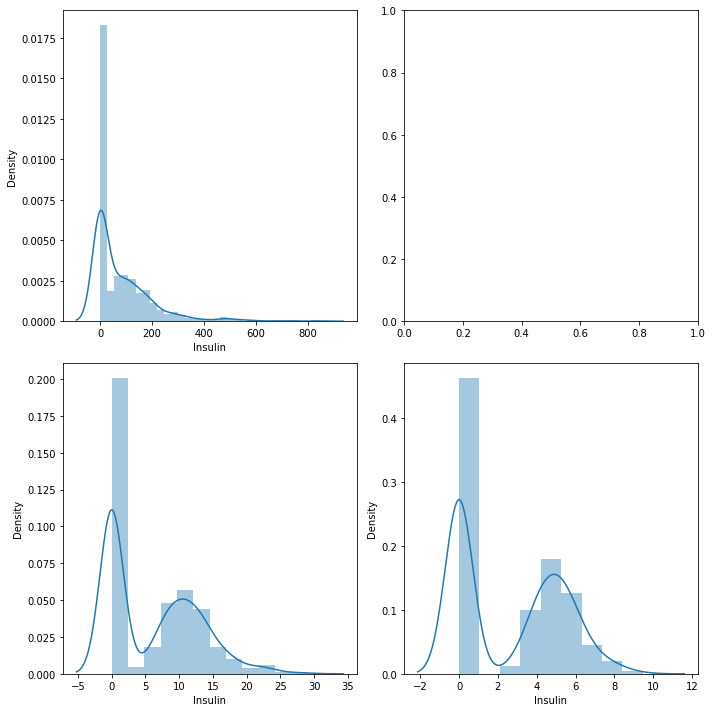

In [4]:
print("Skewness: %f" %df_patients['Insulin'].skew())

log_insuline = np.log(df_patients['Insulin'])
print('Log Transformation: ',log_insuline.skew())

sqrt_insuline = np.sqrt(df_patients['Insulin'])
print('Sqrt Transformation: ',sqrt_insuline.skew())

cbrt_insuline = np.cbrt(df_patients['Insulin'])
print('Cbrt Transformation: ',cbrt_insuline.skew())

fig, ax = plt.subplots(2, 2, figsize = (10, 10))
sns.distplot(df_patients['Insulin'],ax = ax[0,0])
# sns.distplot(log_km_driven, ax = ax[0,1])
sns.distplot(sqrt_insuline, ax = ax[1,0])
sns.distplot(cbrt_insuline, ax = ax[1,1])
plt.tight_layout()

Skewness: 1.919911
Log Transformation:  0.11417768826564402
Sqrt Transformation:  0.9018017197488095
Cbrt Transformation:  0.6222161053177405


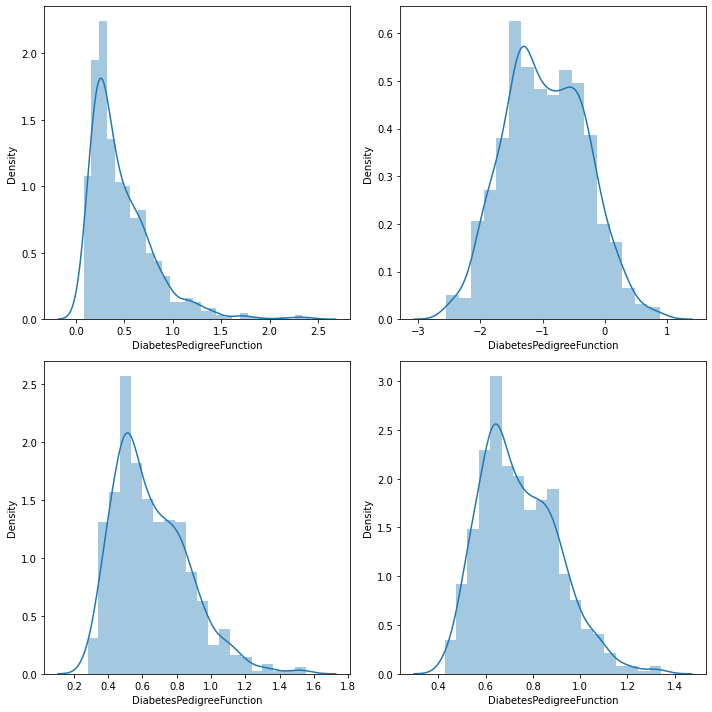

In [5]:
print("Skewness: %f" %df_patients['DiabetesPedigreeFunction'].skew())

log_DPF = np.log(df_patients['DiabetesPedigreeFunction'])
print('Log Transformation: ',log_DPF.skew())

sqrt_DPF = np.sqrt(df_patients['DiabetesPedigreeFunction'])
print('Sqrt Transformation: ',sqrt_DPF.skew())

cbrt_DPF = np.cbrt(df_patients['DiabetesPedigreeFunction'])
print('Cbrt Transformation: ',cbrt_DPF.skew())

fig, ax = plt.subplots(2, 2, figsize = (10, 10))
sns.distplot(df_patients['DiabetesPedigreeFunction'],ax = ax[0,0])
sns.distplot(log_DPF, ax = ax[0,1])
sns.distplot(sqrt_DPF, ax = ax[1,0])
sns.distplot(cbrt_DPF, ax = ax[1,1])
plt.tight_layout()

Skewness: 1.129597
Log Transformation:  0.6017461375371188
Sqrt Transformation:  0.8505983120345812
Cbrt Transformation:  0.7644332551552814


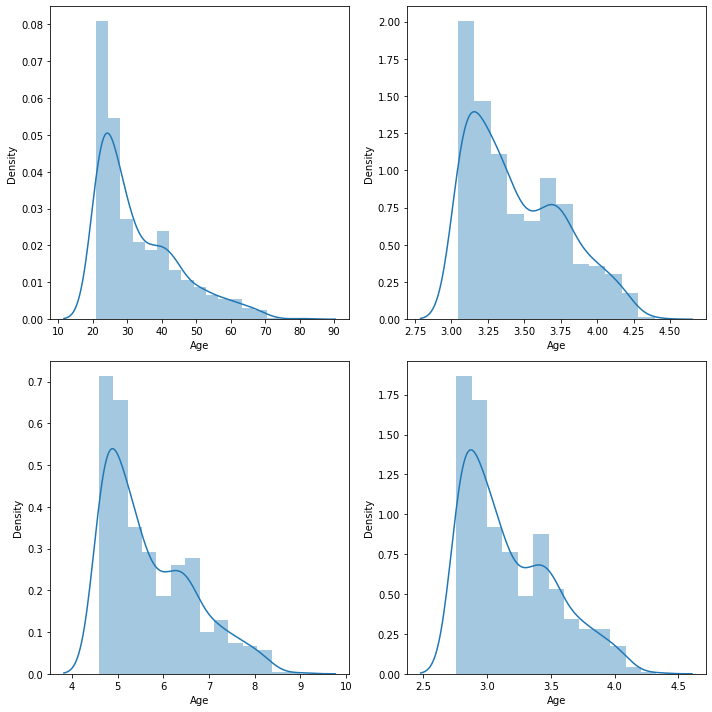

In [6]:
print("Skewness: %f" %df_patients['Age'].skew())

log_Age = np.log(df_patients['Age'])
print('Log Transformation: ',log_Age.skew())

sqrt_Age = np.sqrt(df_patients['Age'])
print('Sqrt Transformation: ',sqrt_Age.skew())

cbrt_Age = np.cbrt(df_patients['Age'])
print('Cbrt Transformation: ',cbrt_Age.skew())

fig, ax = plt.subplots(2, 2, figsize = (10, 10))
sns.distplot(df_patients['Age'],ax = ax[0,0])
sns.distplot(log_Age, ax = ax[0,1])
sns.distplot(sqrt_Age, ax = ax[1,0])
sns.distplot(cbrt_Age, ax = ax[1,1])
plt.tight_layout()

#### 2.3 Replacing the skewed values with transformed values

In [7]:
df_patients['Insulin'] = sqrt_Age
df_patients['DiabetesPedigreeFunction'] = log_DPF
df_patients['Age'] = log_Age
df_patients.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,7.071068,33.6,-0.466809,3.912023,1
1,1,85,66,29,5.567764,26.6,-1.046969,3.433987,0
2,8,183,64,0,5.656854,23.3,-0.397497,3.465736,1
3,1,89,66,23,4.582576,28.1,-1.789761,3.044522,0
4,0,137,40,35,5.744563,43.1,0.827678,3.496508,1


#### 2.4 Check correlation

Correlation
Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.275077
Insulin                     0.258072
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.180612
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


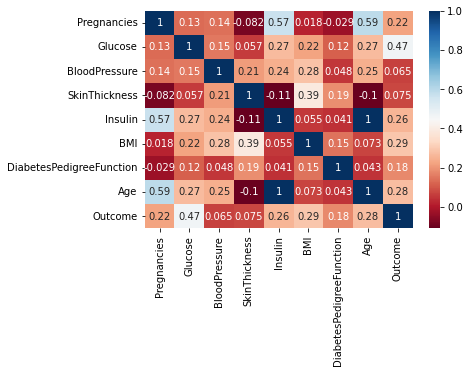

In [8]:
print('Correlation')
print(df_patients.corr()['Outcome'].sort_values(ascending=False))
sns.heatmap(df_patients.corr(), annot=True, cmap="RdBu")
plt.show()

#### Insuline level and Age have a positive coorelation so one of the variabels can be dropped
We are dropping here Insuline

In [9]:
df_patients = df_patients.drop('Insulin',axis= 1)

### 3. Training Process

In [10]:
X = df_patients.drop("Outcome",axis=1)
y= df_patients["Outcome"] #We will predict Outcome(diabetes) 

In [11]:
X.shape,y.shape

((768, 7), (768,))

In [12]:
X_train = X.iloc[:600]
X_test = X.iloc[600:]
y_train = y[:600]
y_test = y[600:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (600, 7)
X_test Shape:  (168, 7)
y_train Shape:  (600,)
y_test Shape:  (168,)


Logistic Regression is so similar to linear Regression because both the models use linear equations for predictions. But the main difference is that Logistic regression is used to handle the classification problems wheras Linear Regression is used to handle regression problems. For example, we can try to predict the price of a house by using linear regression because we are predicting a price, a continuous number. But if we want to understand if an email is spam or not, we need to use Logistic Regression because we try to solve a binary classification problem (problem with two class values, *Spam* or *Not Spam* in this example).  

**Logistic(Sigmoid - σ) Function: The core of the method**

  The logistic function, also called the sigmoid function was developed by statisticians to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.
  
  The formula of sigmoid function as below:
  
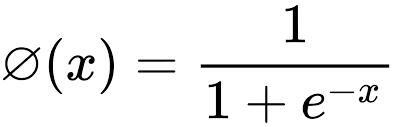

Here e is base of the natural logarithms (Euler’s number) and value is the actual numerical value that we want to transform. 

  Input values (x) are combined linearly using weights or coefficient values to predict an output value y that equals to σ(x).

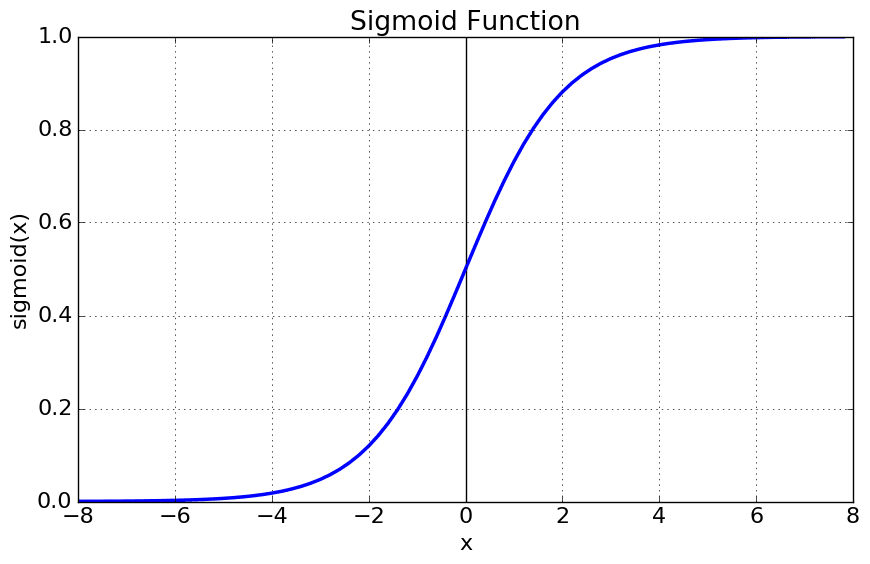]

In [13]:
logistic_regression = LogisticRegression(random_state=0,solver="liblinear").fit(X_train,y_train)

print('Intercept',logistic_regression.intercept_)
print('Coeficient',logistic_regression.coef_)

Intercept [-3.22961209]
Coeficient [[ 0.1639863   0.02923236 -0.01080331 -0.00769736  0.0777129   0.66006057
  -0.77428139]]


In [14]:
# Model with statsmodel library
lr_statsmodel = sm.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.505918
         Iterations 6


In [15]:
lr_statsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  600
Model:                          Logit   Df Residuals:                      593
Method:                           MLE   Df Model:                            6
Date:                Fri, 22 Jul 2022   Pseudo R-squ.:                  0.2161
Time:                        10:48:14   Log-Likelihood:                -303.55
converged:                       True   LL-Null:                       -387.22
Covariance Type:            nonrobust   LLR p-value:                 1.657e-33
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.2089      0.034      6.172      0.000       0.143       0.275
Glucose                      0.0299      0.004      8.023      0.000       0.023       0.037
BloodPressure               -0.0105      0.006     -1.855      0.064      -0.022       0.001
SkinThickness               -0.0096      0.007     -1.432      0.152      -0.023       0.004
BMI                          0.0700      0.015      4.670      0.000       0.041       0.099
DiabetesPedigreeFunction     0.7458      0.162      4.591      0.000       0.427       1.064
Age                         -1.6777      0.211     -7.939      0.000      -2.092      -1.264
============================================================================================
"""

### 4. Evaluating the Model

In [16]:
y_pred = logistic_regression.predict(X_test)
tn, fp, fn, tp  = confusion_matrix(y_test,y_pred).ravel()
tn, fp, fn, tp 

(98, 10, 27, 33)

In [18]:
from sklearn.metrics import precision_score,recall_score
print('Precision:',precision_score(y_test,y_pred,average='weighted'))
print('Recall:',recall_score(y_test,y_pred))

Precision: 0.7780863787375416
Recall: 0.55


In [19]:
print('Accuracy: ',accuracy_score(y_test,y_pred))

Accuracy:  0.7797619047619048


In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       108
           1       0.77      0.55      0.64        60

    accuracy                           0.78       168
   macro avg       0.78      0.73      0.74       168
weighted avg       0.78      0.78      0.77       168



### 5. Model Tuning using K-Fold Cross Validation.

In [26]:
accuracies= cross_val_score(estimator=logistic_regression,
                            X=X_train,y=y_train,
                            cv=5)
print("Average Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standart Deviation of Accuracies: {:.2f} %".format(accuracies.std()*100))

Average Accuracy: 76.50 %
Standart Deviation of Accuracies: 3.14 %


In [27]:
logistic_regression.predict(X_test)[:10]

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0])

In [28]:
results =pd.DataFrame(logistic_regression.predict_proba(X_test)[:10],
             columns=["Possibility of 0","Possibility of 1"])

results["Class"]=[1 if i>0.5 else 0 for i in results["Possibility of 1"]]
results

,Possibility of 0,Possibility of 1,Class
0,0.877070,0.122930,0
1,0.781399,0.218601,0
2,0.924859,0.075141,0
3,0.344987,0.655013,1
4,0.234265,0.765735,1
5,0.586572,0.413428,0
6,0.127176,0.872824,1
7,0.936857,0.063143,0
8,0.540764,0.459236,0
9,0.921333,0.078667,0


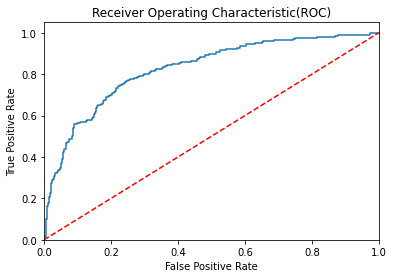

In [29]:
logistic_regression_roc = roc_auc_score(y,logistic_regression.predict(X))

fp,tp,trshld = roc_curve(y,logistic_regression.predict_proba(X)[:,1])
plt.figure()
plt.plot(fp,tp,label="Area Under Curve(AUC)" %logistic_regression_roc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic(ROC)")
plt.show()

### 6. Using Hyperparameter Tuning

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [31]:
classifier=LogisticRegression()

In [32]:
# Performing Grid Search CV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [34]:
classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='precision',cv=5)
classifier_regressor.fit(x_train,Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='precision')

In [36]:
print(classifier_regressor.best_params_)

{'C': 5, 'max_iter': 100, 'penalty': 'l2'}


In [37]:
print(classifier_regressor.best_score_)

0.7416228445640212


In [38]:
##prediction
y_pred_=classifier_regressor.predict(x_test)

In [40]:
score=accuracy_score(y_pred_,Y_test)
print(score)

0.734375


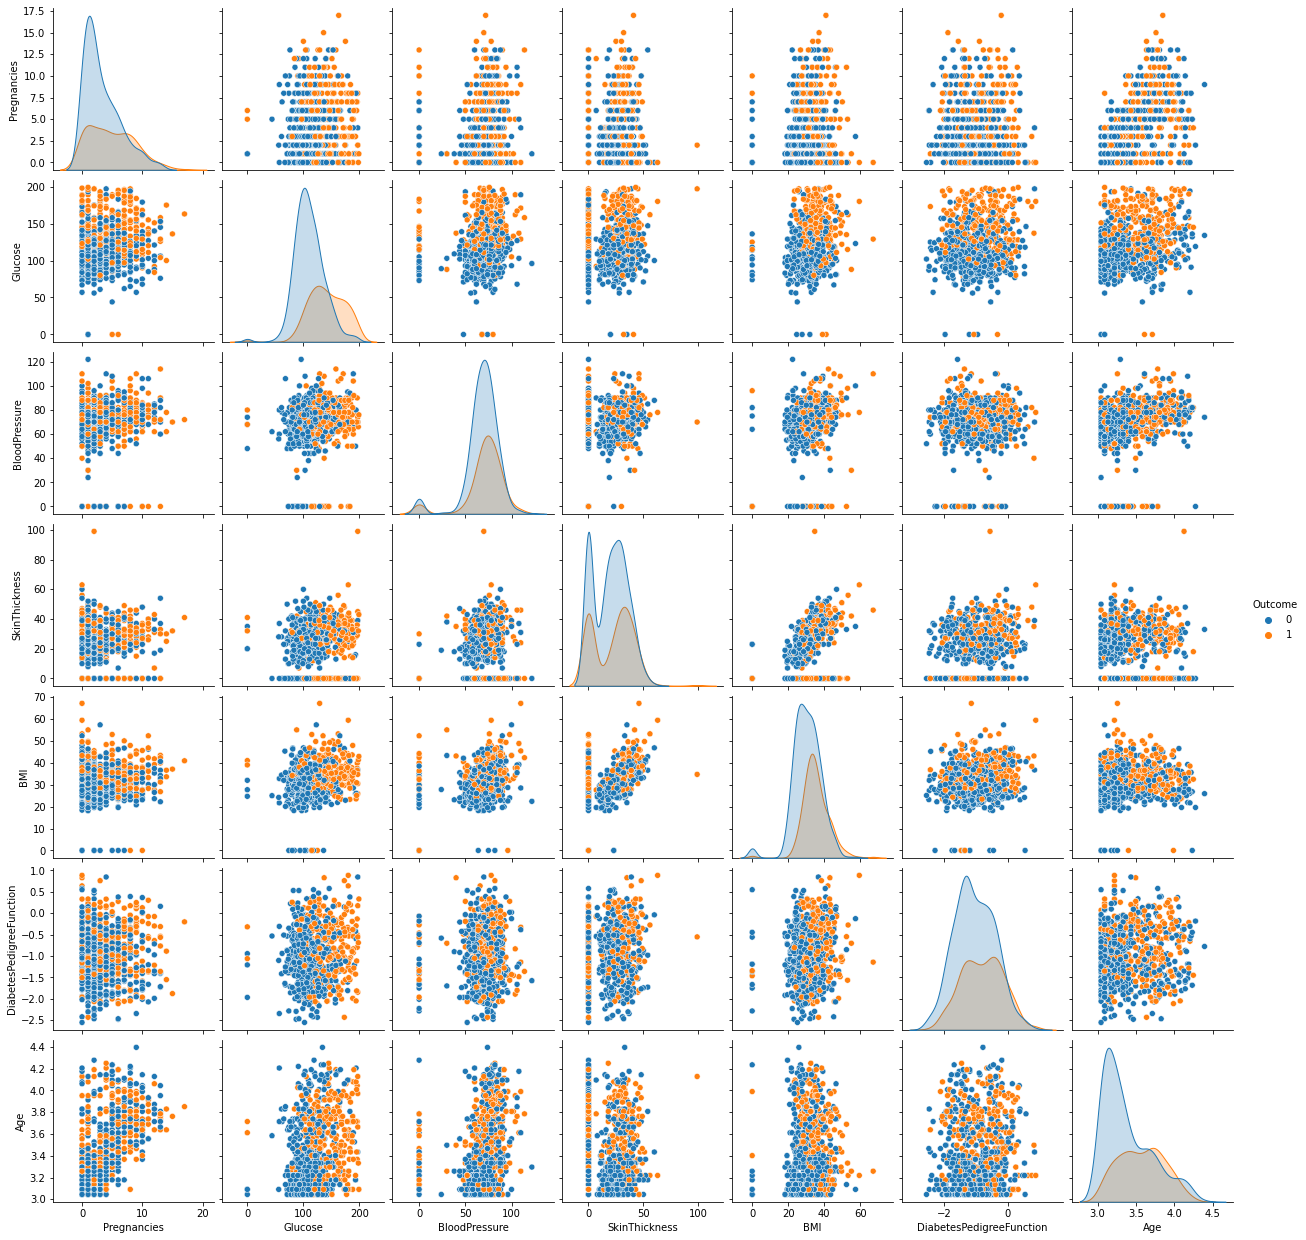

In [43]:
##EDA
sns.pairplot(df_patients,hue='Outcome')

In [45]:
df_patients.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,0.017683,-0.028542,0.589502,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.221071,0.115807,0.271968,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.281805,0.047974,0.245743,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.392573,0.189502,-0.103950,0.074752
BMI,0.017683,0.221071,0.281805,0.392573,1.000000,0.145350,0.072649,0.292695
DiabetesPedigreeFunction,-0.028542,0.115807,0.047974,0.189502,0.145350,1.000000,0.043273,0.180612
Age,0.589502,0.271968,0.245743,-0.103950,0.072649,0.043273,1.000000,0.275077
Outcome,0.221898,0.466581,0.065068,0.074752,0.292695,0.180612,0.275077,1.000000
